In [232]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow as tf
#from sklearn.model_selection import train_test_split

# Hides output while after model learned
from IPython.display import clear_output
from IPython import display

from zipfile import ZipFile

import sys
#set path
sys.path.insert(1, '../')

from utils.reader_config import config_reader

# Import parameters
config = config_reader('../config/config.json')

# Set the seed value for experiment reproducibility.
random_seed = config.random_seed
#tf.random.set_seed(random_seed)
np.random.seed(random_seed)

path_figures = "../figures/"
path_data = "../data/" 
path_models = '../models/'
print(path_models,'\n', path_data)

../models/ 
 ../data/


# List of extracted features and descriptions:


| Feature Name | Description|
| :--- | :-- |
| Flow ID |   |
| Source IP |   |
| Source Port |   |
| Destination IP |   |
| Destination Port |   |
| Protocol |   |
| Timestamp |   |
| Flow Duration | Duration of the flow in Microsecond  |
| Total Fwd Packets <br> Total Backward Packets|  Total packets in the forward (backward) direction |
| Total Length of Fwd Packets <br>  Total Length of Bwd Packets| Total size of packet in forward (backward) direction |
| Fwd Packet Length Max <br> Fwd Packet Length Min <br> Fwd Packet Length Mean <br> Fwd Packet Length Std <br> Bwd Packet Length Max <br> Bwd Packet Length Min <br> Bwd Packet Length Mean <br> Bwd Packet Length Std|  Max (Min, Mean, SD) size of packet in backward  (backward)  direction |
| Flow Bytes/s <br> Flow Packets/s |  Number of flow packets (bytes) per second |
| Flow IAT Mean <br> Flow IAT Std <br> Flow IAT Max <br> Flow IAT Min | Mean (SD, Max, Min) time between two packets sent in the flow  |
| Fwd IAT Total <br> Fwd IAT Mean <br> Fwd IAT Std <br> Fwd IAT Max  <br> Fwd IAT Min | Total time (Mean, SD, Max, Min) between two packets sent in the forward direction  |
| Bwd IAT Total <br> Bwd IAT Mean <br> Bwd IAT Std <br> Bwd IAT Max  <br> Bwd IAT Min | Total time (Mean, SD, Max, Min) between two packets sent in the backward direction |
| Fwd PSH Flags <br> Bwd PSH Flags | Number of times the PSH flag was set in packets travelling in the forward (backward) direction (0 for UDP)  |
| Fwd URG Flags <br> Bwd URG Flags | Number of times the URG flag was set in packets travelling in the forward (backward) direction (0 for UDP)  |
| Fwd Header Length <br> Bwd Header Length | Total bytes used for headers in the forward direction  |
| Fwd Packets/s <br> Bwd Packets/s | Number of forward (backward) packets per second  |
| Min Packet Length <br>  Max Packet Length <br> Packet Length Mean <br> Packet Length Std  <br> Packet Length Variance <br>  | Mean (Max, Mean, SD, Variance) length of a packet |
| FIN Flag Count <br> SYN Flag Count <br> RST Flag Count <br> PSH Flag Count <br> ACK Flag Count <br> URG Flag Count  <br> CWE Flag Count  <br> ECE Flag Count |  Number of packets with FIN (SYN, RST, PSH, ACK, URG, CWE, ECE) |
| Down/Up Ratio | Download and upload ratio |
| Average Packet Size | Average size of packet |
| Avg Fwd Segment Size <br> Avg Bwd Segment Size | Average size observed in the forward  (backward) direction |
| Fwd Header Length.1 |   |
| Fwd Avg Bytes/Bulk <br> Fwd Avg Packets/Bulk <br> Fwd Avg Bulk Rate | Average number of bytes (packets, bulk) bulk rate in the forward direction   |
| Bwd Avg Bytes/Bulk <br> Bwd Avg Packets/Bulk <br> Bwd Avg Bulk Rate | Average number of bytes (packets, bulk) bulk rate in the backward direction  |
| Sub Flow Fwd Packets <br> Sub Flow Fwd Bytes| The average number of packets (bytes) in a sub flow in the forward direction  |
| Sub Flow Bwd Packets <br> Sub Flow Bwd Bytes | The average number of packets (bytes) in a sub flow in the backward direction   |
| Init_Win_bytes_forward <br> Init_Win_bytes_backward  | The total number of bytes sent in initial window in the forward (backward) direction |
| act_data_pkt_ Fwd | Count of packets with at least 1 byte of TCP data payload in the forward direction |
| Min_seg_size_forward | Minimum segment size observed in the forward direction |
| Active Mean (Std, Max, Min) | Mean (Standard deviation, Maximum, Minimum) time a flow was active before becoming idle  |
| Idle Mean (Std, Max, Min) | Mean (Standard deviation, Maximum, Minimum) time a flow was idle before becoming active |
| SimillarHTTP |   |
| Inbound |   |
| Label |   |

# Read data

In [233]:
archive = 'CSV-03-11.zip' #''CSV-01-12.zip'
with ZipFile(path_data + archive) as myzip:
    # list available files in the container
    print(myzip.namelist())

['03-11/', '03-11/UDPLag.csv', '03-11/UDP.csv', '03-11/.~lock.UDPLag.csv#', '03-11/LDAP.csv', '03-11/MSSQL.csv', '03-11/NetBIOS.csv', '03-11/Portmap.csv', '03-11/Syn.csv']


In [234]:
# remove spaces from feature names
import re
rename_dic = dict()


with ZipFile(path_data+'CSV-01-12.zip') as myzip, myzip.open('01-12/DrDoS_LDAP.csv', 'r') as myfile:
    # list available files in the container
    #print(myzip.namelist())
    df = pd.read_csv(myfile, index_col='Unnamed: 0', nrows=1e5, low_memory=False)
    
for i in df.columns:
    rename_dic[i] = re.sub('^\s+|\s+$/g', "", i)
df.rename(columns=rename_dic, inplace=True)

#df.columns
df.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
21010,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:22:40.254769,9141643,85894,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
20932,172.16.0.5-192.168.50.1-900-1808-17,172.16.0.5,900,192.168.50.1,1808,17,2018-12-01 11:22:40.255361,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [235]:
# with ZipFile(path_data + archive) as myzip, myzip.open('03-11/Portmap.csv', 'r') as myfile: #'01-12/DrDoS_LDAP.csv'
#     df1 = pd.read_csv(myfile, nrows=10, low_memory=False);#,index_col='Unnamed: 0' 

# df1.head()

# Feature analysis

In [236]:
df.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
21010,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:22:40.254769,9141643,85894,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
20932,172.16.0.5-192.168.50.1-900-1808-17,172.16.0.5,900,192.168.50.1,1808,17,2018-12-01 11:22:40.255361,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
df = df.astype({
    'Flow ID':'category', 'Protocol':'category', 'Flow Duration':'category',
    'Total Fwd Packets':'category', 'Total Backward Packets':'category',
    })
    #     , 'Source IP', 'Source Port', 'Destination IP',
    #    'Destination Port', 'Timestamp', 
    #     ,
    #    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    #    'Fwd Packet Length Max', 'Fwd Packet Length Min',
    #    'Fwd Packet Length Mean', 'Fwd Packet Length Std',
    #    'Bwd Packet Length Max', 'Bwd Packet Length Min',
    #    'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    #    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
    #    'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
    #    'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    #    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
    #    'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
    #    'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    #    'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    #    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    #    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    #    'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
    #    'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
    #    'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
    #    'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
    #    'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    #    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
    #    'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 21010 to 18892
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Flow ID                      100000 non-null  category
 1   Source IP                    100000 non-null  object  
 2   Source Port                  100000 non-null  int64   
 3   Destination IP               100000 non-null  object  
 4   Destination Port             100000 non-null  int64   
 5   Protocol                     100000 non-null  category
 6   Timestamp                    100000 non-null  object  
 7   Flow Duration                100000 non-null  int64   
 8   Total Fwd Packets            100000 non-null  int64   
 9   Total Backward Packets       100000 non-null  int64   
 10  Total Length of Fwd Packets  100000 non-null  float64 
 11  Total Length of Bwd Packets  100000 non-null  float64 
 12  Fwd Packet Length Max        100000 non-null  

### Flow Duration

In [239]:
f = list(df['Flow Duration'].value_counts().nlargest(5).index)
#f.sort()
print(f)
# plt.figure(figsize=(6,4))
# sns.histplot(df['Source Port'])
# plt.yscale('log');

[1, 2, 0, 49, 48]


In [240]:
nums = [1, 2, 0, 49, 48]
df['Flow Duration'] = df['Flow Duration'].apply(lambda x: x if x in nums else 100)

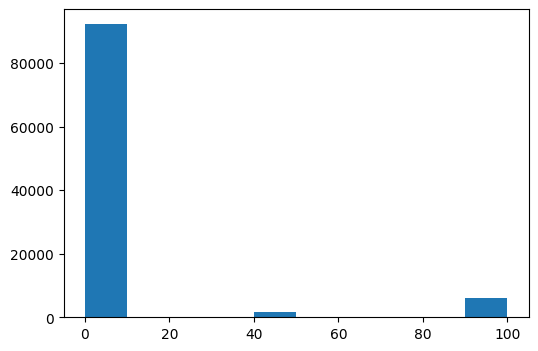

In [241]:
plt.figure(figsize=(6,4))
plt.hist(df['Flow Duration']);

### Protocol

In [242]:
df['Protocol'].value_counts().nlargest(5)#.index)
#f.sort()
#print(f)
# plt.figure(figsize=(6,4))
# sns.histplot(df['Source Port'])
# plt.yscale('log');

Protocol
17    99929
6        62
0         9
Name: count, dtype: int64

### Flow Duration

In [243]:
df['Flow Duration'].value_counts().nlargest(5)

Flow Duration
1      66325
2      23516
100     6132
0       2502
49       814
Name: count, dtype: int64

In [ ]:
#df['Flow Duration'] = np.log10(df['Flow Duration']).replace([np.inf, -np.inf], 0).astype('int32')
df['Flow Duration'] = np.digitize(df['Flow Duration'], bins=[1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7])
df['Flow Duration'] = df['Flow Duration'].astype('category')
#df['Flow Duration']

In [ ]:
# pd.cut(df['Flow Duration'], 
#        bins=[0, 1, 10, 100, 1000, 10000, 15000, 20000, 25000, 50000, 1e5, 1e6, 1e7],
#        labels=False, retbins=True)#.value_counts()

### Total Fwd Packets

In [256]:
df['Total Fwd Packets'].nlargest(10)

Unnamed: 0
21010    85894
20922    85787
20937    85738
18587       28
22412       28
15          20
21174       18
2727        14
14379       12
9577        12
Name: Total Fwd Packets, dtype: int64

In [ ]:
df['Total Fwd Packets'] = np.digitize(df['Total Fwd Packets'], bins=[100, 1000, 1e4, 1e5, 1e6])
df['Total Fwd Packets'] = df['Total Fwd Packets'].astype('category')

### 'Total Backward Packets'

In [262]:
df['Total Backward Packets'].nlargest(10)

Unnamed: 0
20922    94
21010    28
15       24
20937    12
18        9
14379     8
30302     8
19008     6
23092     6
2         5
Name: Total Backward Packets, dtype: int64

In [263]:
df['Total Backward Packets'] = np.digitize(df['Total Backward Packets'], bins=[1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7])
df['Total Backward Packets'] #= df['Total Backward Packets'].astype('category')

Unnamed: 0
21010    2
20932    0
27876    0
24270    0
5109     0
        ..
26444    0
24719    0
28424    0
19748    0
18892    0
Name: Total Backward Packets, Length: 100000, dtype: int64

### Total Length of Fwd Packets

In [264]:
df['Total Length of Fwd Packets'].value_counts()

Total Length of Fwd Packets
2944.0     87776
2928.0      4184
2848.0      2002
2896.0      1985
2736.0       965
           ...  
20608.0        1
14720.0        1
794.0          1
5472.0         1
52.0           1
Name: count, Length: 82, dtype: int64

<Axes: >

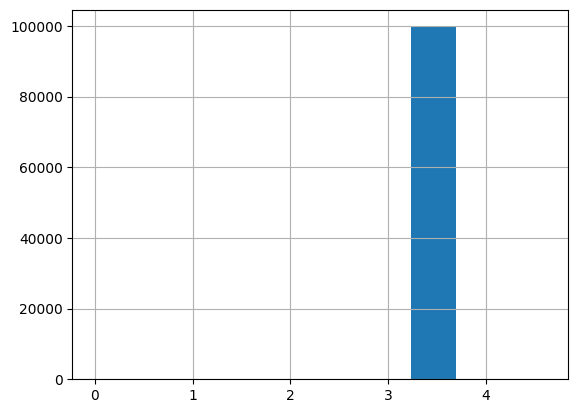

In [268]:
np.log10(df['Total Length of Fwd Packets']).replace([np.inf, -np.inf], 0).hist()

## Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('FeatureSelection', SelectKBest(f_regression, k=5)),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression())])



In [ ]:
#!pip install joblib
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

In [ ]:
nums = [1, 2, 0, 49, 48]
df['Flow Duration'] = df['Flow Duration'].apply(lambda x: x if x in nums else 100)

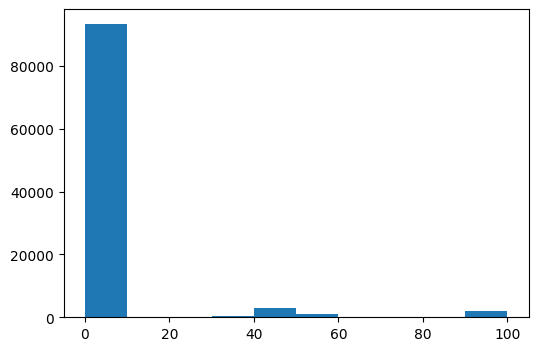

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['Flow Duration']);

In [ ]:
df1.rename(columns={' Source IP':' Source IP'})

In [45]:

for i in df1.columns:

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [40]:
df1[' Label'].value_counts()

 Label
Portmap    95273
BENIGN      4727
Name: count, dtype: int64

In [43]:
df1[' Timestamp'].min()

'2018-11-03 09:18:16.964447'

In [28]:
df[' Source Port'].value_counts()

 Source Port
900      49151
758        101
596        101
726        101
566        101
         ...  
65410        1
7692         1
6380         1
50892        1
55289        1
Name: count, Length: 572, dtype: int64

In [26]:
df[' Label'].value_counts()

 Label
DrDoS_LDAP    99970
BENIGN           30
Name: count, dtype: int64

Labels contain either *Benign*, which denote normal packages, and an attack class label

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 21010 to 12696
Data columns (total 87 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Flow ID                       1000000 non-null  object 
 1    Source IP                    1000000 non-null  object 
 2    Source Port                  1000000 non-null  int64  
 3    Destination IP               1000000 non-null  object 
 4    Destination Port             1000000 non-null  int64  
 5    Protocol                     1000000 non-null  int64  
 6    Timestamp                    1000000 non-null  object 
 7    Flow Duration                1000000 non-null  int64  
 8    Total Fwd Packets            1000000 non-null  int64  
 9    Total Backward Packets       1000000 non-null  int64  
 10  Total Length of Fwd Packets   1000000 non-null  float64
 11   Total Length of Bwd Packets  1000000 non-null  float64
 12   Fwd Packet Length Max        1

In [27]:
# import re
print([re.sub('^\s+|\s+$/g', "", word) for word in list(df.columns)])

['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH 

In [16]:
print(list(df.columns))

['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [28]:
true_col = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 
 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 
 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 
 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 
 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 
 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 
 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 
 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 
 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 
 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 
 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 
 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 
 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 
 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 
 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 
 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 
 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 
 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 
 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 
 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'SimillarHTTP', 'Inbound', 'Label']

In [ ]:
text_col = ['Flow Byte/s','Flow Packets/s','Flow IAT Mean','Flow IAT Std',
    'Flow IAT Max','Flow IAT Min','Fwd IAT Min','Fwd IAT Max','Fwd IAT Mean','Fwd IAT Std ',
    'Fwd IAT Total ','Bwd IAT Min ','Bwd IAT Max ','Bwd IAT Mean','Bwd IAT Std',
    'Bwd IAT Total','Fwd PSH flag', 'Bwd PSH Flag','Fwd URG Flag','Bwd URG Flag',
    'Fwd Header Length ','Bwd Header Length ','FWD Packets/s','Bwd Packets/s',
    'Min Packet Length','Max Packet Length','Packet Length Mean','Packet Length Std ',
    'Packet Length Variance ','FIN Flag Count ','SYN Flag Count ','RST Flag Count ',
    'PSH Flag Count ','ACK Flag Count ','URG Flag Count ','CWR Flag Count ',
    'ECE Flag Count ','down/Up Ratio','Average Packet Size','Avg Fwd Segment Size',
    'AVG Bwd Segment Size','Fwd Header Length ','Fwd Avg Bytes/Bulk ',
    'Fwd AVG Packet/Bulk','Fwd AVG Bulk Rate','Bwd Avg Bytes/Bulk ','Bwd AVG Packet/Bulk',
    'Bwd AVG Bulk Rate','Subflow Fwd Packets ','Subflow Fwd Bytes ','Subflow Bwd Packets ',
    'Subflow Bwd Bytes ','Init_Win_bytes_forward ','Init_Win_bytes_backward ',
    'Act_data_pkt_forward ','min_seg_size_forward ','Active Min',
    'Active Mean','Active Max','Active Std','Idle Min','Idle Mean','Idle Max','Idle Std']

text_col = [re.sub('$\s+|\s+$/g', "", word) for word in text_col]


In [ ]:
set(text_col) & set(true_col)

{'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packets/s',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Max Packet Length',
 'Min Packet Length',
 'Packet Length Mean'}

In [1]:
2.2 + 0.876 + 7.3 + 8.8 + 2.9+ 0.441 + 1.9

24.416999999999998

In [2]:
70+48+359+37+256

770

In [9]:
2906/60

48.43333333333333

In [8]:
attacks = {'PortMap','NetBIOS','LDAP','MSSQL','UDP','UDP-Lag','SYN','NTP','DNS','LDAP',
'MSSQL','NetBIOS','SNMP','SSDP','UDP','UDP-Lag','WebDDoS (ARME)','SYN','TFTP'}
attacks = list(attacks)
print(sorted(attacks))

['DNS', 'LDAP', 'MSSQL', 'NTP', 'NetBIOS', 'PortMap', 'SNMP', 'SSDP', 'SYN', 'TFTP', 'UDP', 'UDP-Lag', 'WebDDoS (ARME)']


ModuleNotFoundError: No module named 'chardet'

In [ ]:
with ZipFile(path_data+'CSV-01-12.zip') as myzip:
    # list available files in the container
    print(myzip.namelist())

    with myzip.open('01-12/DrDoS_LDAP.csv', 'r') as myfile:
        df = pd.read_csv(myfile, index_col='Unnamed: 0', nrows=10)
        #for chunk in pd.read_csv(myfile, chunksize=ChunkSize, index_col='Unnamed: 0'):
            #df = chunk
            #break
            #while counter < 5:
                #df = pd.concat([df, chunk])
                #counter +=1

df.head()

['01-12/', '01-12/UDPLag.csv', '01-12/TFTP.csv', '01-12/Syn.csv', '01-12/DrDoS_UDP.csv', '01-12/DrDoS_SSDP.csv', '01-12/DrDoS_SNMP.csv', '01-12/DrDoS_NTP.csv', '01-12/DrDoS_NetBIOS.csv', '01-12/DrDoS_MSSQL.csv', '01-12/DrDoS_LDAP.csv', '01-12/DrDoS_DNS.csv']


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
21010,172.16.0.5-192.168.50.1-0-0-0,172.16.0.5,0,192.168.50.1,0,0,2018-12-01 11:22:40.254769,9141643,85894,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
20932,172.16.0.5-192.168.50.1-900-1808-17,172.16.0.5,900,192.168.50.1,1808,17,2018-12-01 11:22:40.255361,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
27876,172.16.0.5-192.168.50.1-900-58766-17,172.16.0.5,900,192.168.50.1,58766,17,2018-12-01 11:22:40.255568,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
24270,172.16.0.5-192.168.50.1-900-35228-17,172.16.0.5,900,192.168.50.1,35228,17,2018-12-01 11:22:40.256113,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
5109,172.16.0.5-192.168.50.1-900-44969-17,172.16.0.5,900,192.168.50.1,44969,17,2018-12-01 11:22:40.256285,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
